In [2]:
import pandas as pd


In [3]:
dataset = pd.read_csv("macro.csv")

In [5]:
dataset.set_index("Date", inplace = True)

In [7]:
dataset['index_moving_avg'] = dataset['index'].rolling(window=200, min_periods=1).mean() # 여기서는 예측을 위한 ... 일단 10달 이평선으로 get it

In [22]:
!pip install finance-datareader


In [23]:
import FinanceDataReader as fdr

# 포스코의 종목 코드는 '005490'
posco = fdr.DataReader('005490', '2013-01-02', '2023-09-29')

dataset['Close'] = posco['Close']
dataset['Weighted_price'] = posco['Close'] * posco['Volume']

In [14]:
dataset['signal'] = np.where(dataset['index_moving_short_avg'] > dataset['index_moving_avg'], 1.0, 0.0)

In [24]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
dataset['EMA10'] = EMA(dataset, 10)
dataset['EMA30'] = EMA(dataset, 30)
dataset['EMA200'] = EMA(dataset, 200)
dataset.head()

#calculation of rate of change
def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))
    return ROC
dataset['ROC10'] = ROC(dataset['Close'], 10)
dataset['ROC30'] = ROC(dataset['Close'], 30)

#Calculation of price momentum
def MOM(df, n):
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))
    return MOM
dataset['MOM10'] = MOM(dataset['Close'], 10)
dataset['MOM30'] = MOM(dataset['Close'], 30)

#calculation of relative strength index
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 rs = u.ewm(com=period-1, adjust=False).mean() / \
 d.ewm(com=period-1, adjust=False).mean()
 return 100 - 100 / (1 + rs)
dataset['RSI10'] = RSI(dataset['Close'], 10)
dataset['RSI30'] = RSI(dataset['Close'], 30)
dataset['RSI200'] = RSI(dataset['Close'], 200)

#calculation of stochastic osillator.

def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

dataset['%K10'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%D10'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%K30'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%D30'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%K200'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 200)
dataset['%D200'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 200)

In [25]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
dataset['MA21'] = MA(dataset, 10)
dataset['MA63'] = MA(dataset, 30)
dataset['MA252'] = MA(dataset, 200)
dataset.tail()

,Open,High,Low,Volume,Change,index,index_moving_avg,index_moving_short_avg,signal,Close,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-21,588000,595000,576000,715070,-0.028620,0.470519,1.672154,0.470519,0.0,577000,...,56.464232,62.650602,75.903614,60.465116,73.255814,62.487462,64.694082,573200.0,572666.666667,400180.0
2023-09-22,568000,573000,556000,924090,-0.013865,0.407039,1.676882,0.407039,0.0,569000,...,56.182113,53.012048,66.265060,52.380952,64.359542,60.882648,63.089268,571800.0,571700.000000,401557.5
2023-09-25,564000,566000,536000,1503031,-0.052724,0.378150,1.681521,0.378150,0.0,539000,...,55.143719,16.867470,44.176707,16.666667,43.170912,54.864594,59.411568,568700.0,570433.333333,402820.0
2023-09-26,539000,549000,532000,870926,-0.011132,0.378250,1.686389,0.378250,0.0,533000,...,54.939612,9.638554,26.506024,9.523810,26.190476,53.660983,56.469408,567400.0,568966.666667,404035.0
2023-09-27,528000,537000,525000,804112,0.003752,0.412657,1.691171,0.412657,0.0,535000,...,54.995417,12.048193,12.851406,11.904762,12.698413,54.062187,54.195921,568000.0,568600.000000,405277.5


In [ ]:
dataset.info()

In [28]:
dataset=dataset.drop(['High','Low','Open', 'Volume','index_moving_avg','index_moving_short_avg'], axis=1)

In [29]:
dataset = dataset.dropna(axis=0)

In [30]:
dataset.tail()

,Change,index,signal,Close,Weighted_price,EMA10,EMA30,EMA200,ROC10,ROC30,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-21,-0.028620,0.470519,0.0,577000,412595390000,579059.597856,568968.888924,430301.553153,-1.029160,-3.511706,...,56.464232,62.650602,75.903614,60.465116,73.255814,62.487462,64.694082,573200.0,572666.666667,400180.0
2023-09-22,-0.013865,0.407039,0.0,569000,525807210000,577230.580064,568970.896090,431681.637202,-0.175439,-1.386482,...,56.182113,53.012048,66.265060,52.380952,64.359542,60.882648,63.089268,571800.0,571700.000000,401557.5
2023-09-25,-0.052724,0.378150,0.0,539000,810133709000,570279.565507,567037.289891,432749.481608,-1.282051,-6.585789,...,55.143719,16.867470,44.176707,16.666667,43.170912,54.864594,59.411568,568700.0,570433.333333,402820.0
2023-09-26,-0.011132,0.378250,0.0,533000,464203558000,563501.462687,564841.335704,433746.999204,0.756144,-2.380952,...,54.939612,9.638554,26.506024,9.523810,26.190476,53.660983,56.469408,567400.0,568966.666667,404035.0
2023-09-27,0.003752,0.412657,0.0,535000,430199920000,558319.378562,562916.088240,434754.491749,-3.254973,-3.254973,...,54.995417,12.048193,12.851406,11.904762,12.698413,54.062187,54.195921,568000.0,568600.000000,405277.5


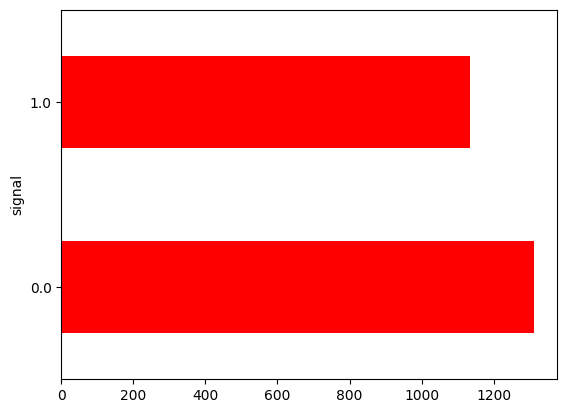

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure()
plot = dataset.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

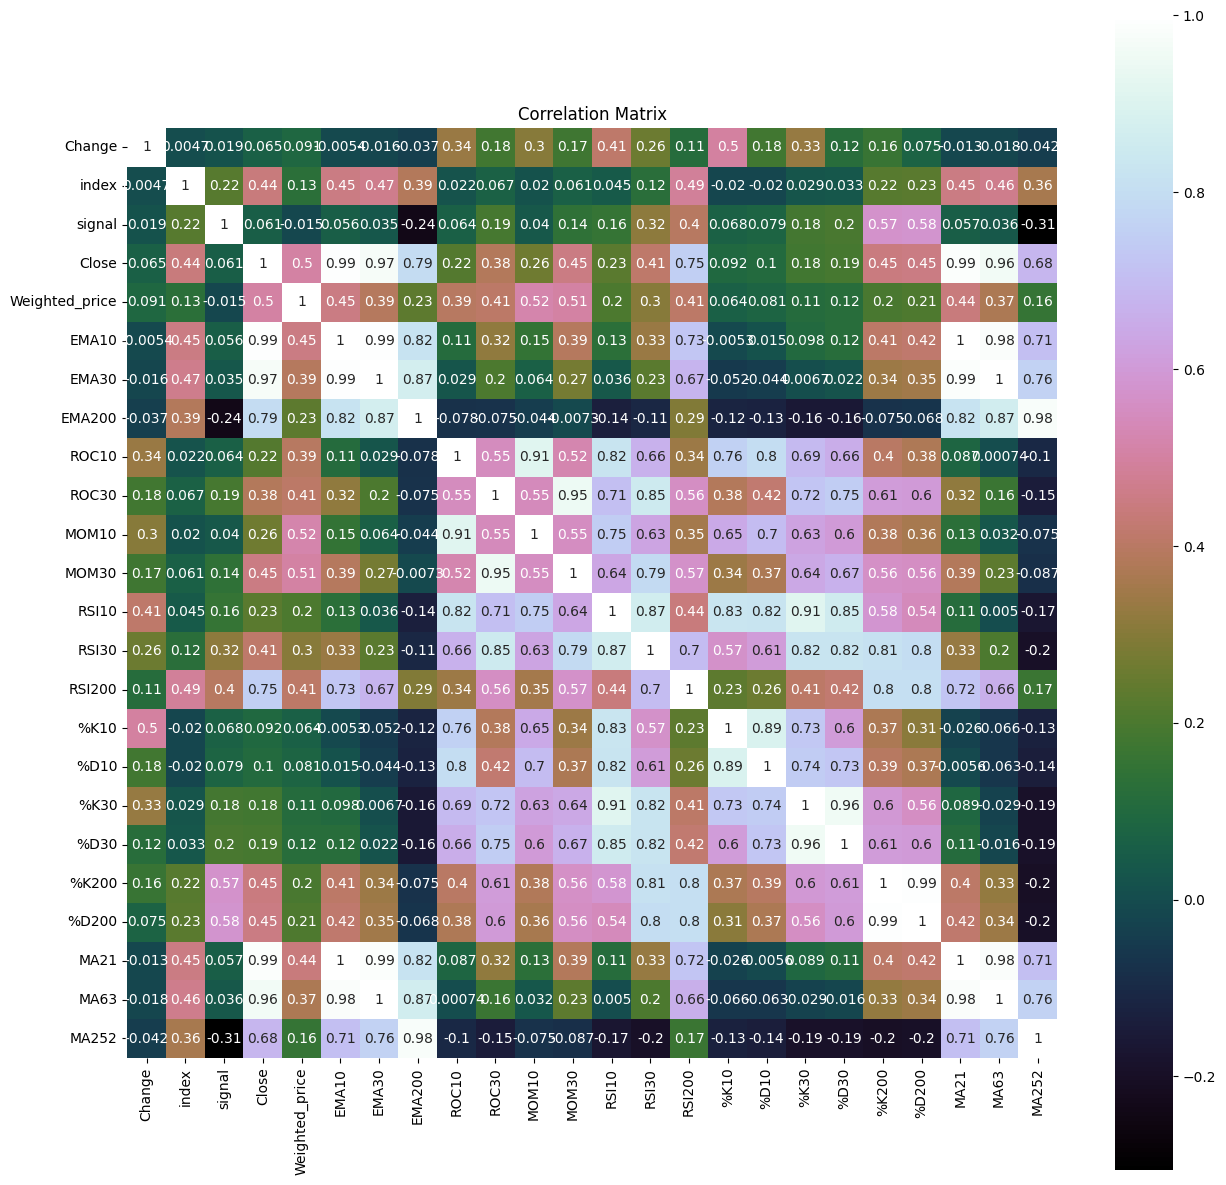

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [34]:
from sklearn.model_selection import train_test_split

subset_dataset= dataset.iloc[-100000:]
Y= subset_dataset["signal"]
X = subset_dataset.loc[:, dataset.columns != 'signal']
validation_size = 0.2
seed = 1
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=1)

In [35]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
#scoring = 'precision'
#scoring = 'recall'
#scoring ='neg_log_loss'
#scoring = 'roc_auc'

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Neural Network
models.append(('NN', MLPClassifier()))
#Ensable Models
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle = True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.538352 (0.026695)
LDA: 0.833357 (0.034019)
KNN: 0.565905 (0.034053)
CART: 0.981588 (0.005714)
NB: 0.476981 (0.034840)
NN: 0.516327 (0.043782)
AB: 0.987214 (0.008019)
GBM: 0.992323 (0.006173)
RF: 0.989265 (0.007016)


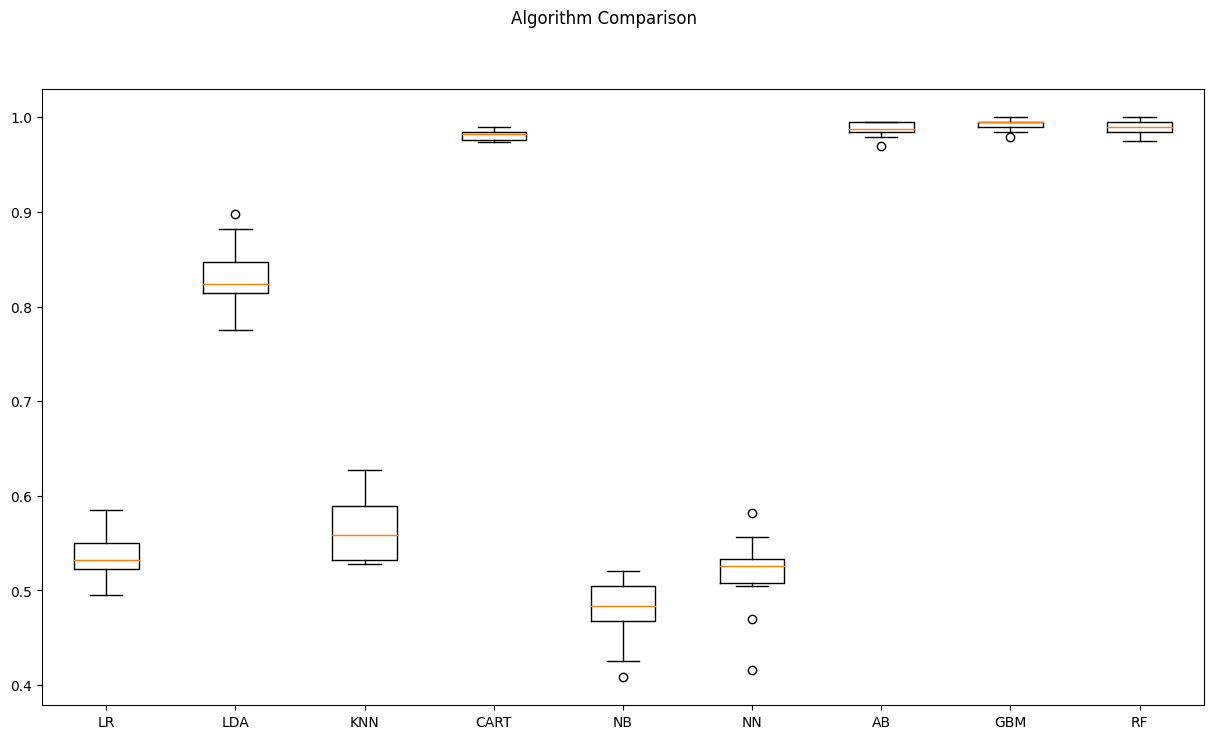

In [38]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier(n_jobs=-1)
kfold = KFold(n_splits=num_folds, shuffle = True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.990285 using {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}
#7 0.965746 (0.010482) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#6 0.967282 (0.010762) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#4 0.987732 (0.005202) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#2 0.989775 (0.005594) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#5 0.972394 (0.008910) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#8 0.964218 (0.006826) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#3 0.989265 (0.006635) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#1 0.990285 (0.004247) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [40]:
model = RandomForestClassifier(criterion='gini', n_estimators=80,max_depth=10,n_jobs=-1) # rbf is default kernel
#model = LogisticRegression()
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=80, n_jobs=-1)

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_validation = Y_validation.fillna(0)

# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9877300613496932
[[256   2]
 [  4 227]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       258
         1.0       0.99      0.98      0.99       231

    accuracy                           0.99       489
   macro avg       0.99      0.99      0.99       489
weighted avg       0.99      0.99      0.99       489



<Axes: xlabel='Predicted', ylabel='Actual'>

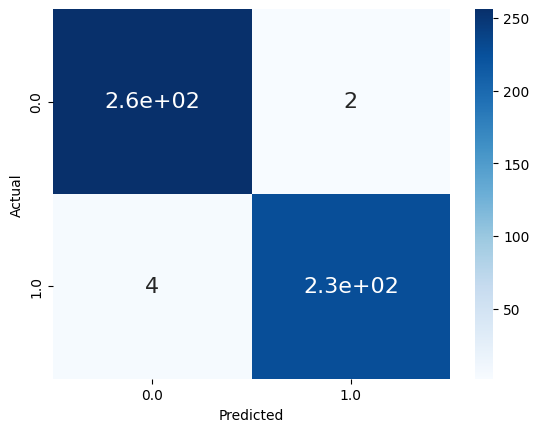

In [42]:
import numpy as np
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font sizes

Text(0.5, 0, 'Variable Importance')

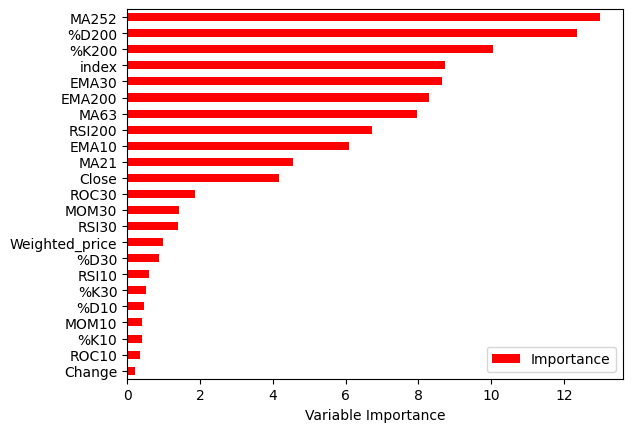

In [43]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r' )
plt.xlabel('Variable Importance')

<Axes: >

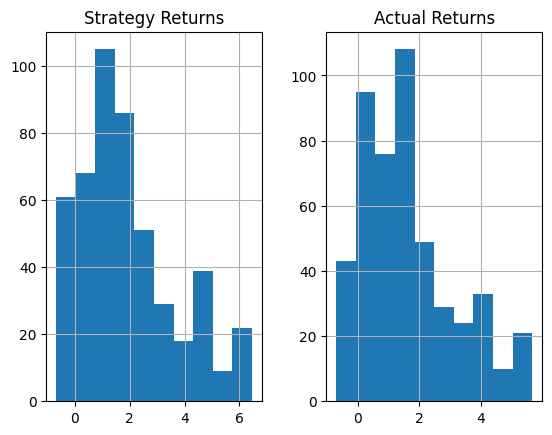

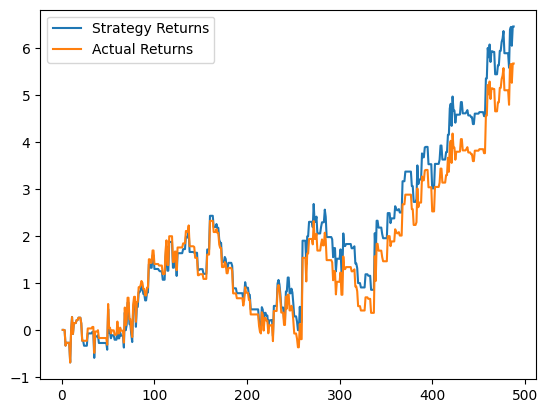

In [44]:
backtestdata = pd.DataFrame(index=X_validation.index)
#backtestdata = pd.DataFrame()
backtestdata['signal_pred'] = predictions
backtestdata['signal_actual'] = Y_validation
backtestdata['Market Returns'] = X_validation['Close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata=backtestdata.reset_index()
backtestdata.head()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()

In [51]:
backtestdata

,Date,signal_pred,signal_actual,Market Returns,Actual Returns,Strategy Returns
0,2022-05-03,0.0,0.0,NaN,NaN,NaN
1,2018-10-10,0.0,0.0,-0.058824,-0.000000,-0.000000
2,2014-08-07,1.0,1.0,0.191176,0.000000,0.000000
3,2018-08-02,1.0,1.0,-0.004630,-0.004630,-0.004630
4,2016-03-18,1.0,1.0,-0.330233,-0.330233,-0.330233
...,...,...,...,...,...,...
484,2017-09-27,1.0,1.0,0.811047,0.811047,0.811047
485,2023-03-06,1.0,1.0,0.057785,0.057785,0.057785
486,2020-07-22,1.0,1.0,-0.400607,-0.400607,-0.400607
487,2017-06-13,0.0,0.0,0.410127,0.410127,0.410127
